# 데이터 특징보기

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import nltk
import re
import ast

In [2]:
data = pd.read_csv('data/Womens Clothing E-Commerce Reviews.csv', index_col=0)

In [3]:
data.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [4]:
data

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


# Rating 분포 분석

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


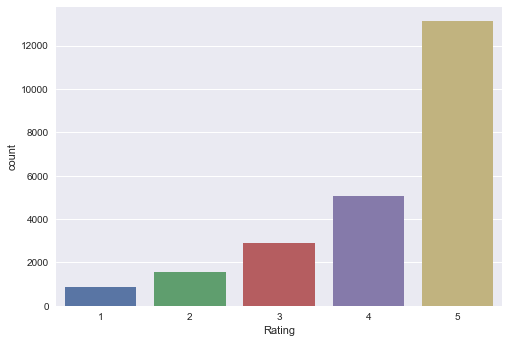

In [5]:
sns.countplot(x="Rating", data=data)
plt.show()

In [6]:
matrix=data.as_matrix()

# Title, Review에서의 부정어 비율 분석

In [7]:
train = pd.read_csv('data/multi/train.csv')
devtest = pd.read_csv('data/multi/devtest.csv')
test = pd.read_csv('data/multi/test.csv')
data = pd.concat((train, devtest, test))
matrixdata=data.as_matrix()

In [8]:
pos_title=[]
pos_review=[]
neg_title=[]
neg_review=[]
neu_title=[]
neu_review=[]
for i in matrixdata:
    title = ast.literal_eval(i[0])
    review = ast.literal_eval(i[1])
    label = i[2]
    
    if label == 2:
        pos_title.extend(title)
        pos_review.extend(review)
    elif label == 1:
        neu_title.extend(title)
        neu_review.extend(review)
    else:
        neg_title.extend(title)
        neg_review.extend(review)

In [9]:
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))

In [10]:
negatives=[]
for i in stop:
    if "'t"in i:
        negatives.append(i)

negative=[]
for i in negatives:
    negative.append(re.sub(r'[^\w\s]','',i))

In [11]:
posnum=0
negnum=0
neunum=0
for i in pos_title+pos_review:
    if i in negative:
        posnum+=1
for i in neg_title+neg_review:
    if i in negative:
        negnum+=1
for i in neu_title+neu_review:
    if i in negative:
        neunum+=1

In [12]:
print(posnum/len(pos_title+pos_review),negnum/len(neg_title+neg_review),neunum/len(neu_title+neu_review))

0.008975424068641465 0.012890500201414065 0.013635121097807665


In [13]:
othereffecters=['but', 'more', 'most', 'no', 'not', 'off', 'too']

In [14]:
posnum1=0
negnum1=0
neunum1=0
for i in pos_title+pos_review:
    if i in othereffecters:
        posnum1+=1
for i in neg_title+neg_review:
    if i in othereffecters:
        negnum1+=1
for i in neu_title+neu_review:
    if i in othereffecters:
        neunum1+=1

In [15]:
print(posnum1/len(pos_title+pos_review),negnum1/len(neg_title+neg_review),neunum1/len(neu_title+neu_review))

0.05123743047308044 0.0710783292355989 0.07627795090481658
